<a href="https://colab.research.google.com/github/musxeni/Predictive-Analytics-/blob/main/Sn_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load Social Network data

In [ ]:
sn_data = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/Social_Network_Ads.csv')

## EDA

In [ ]:
display(sn_data.head())

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
sn_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
sn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### Estimated salary histogram

Text(0.5, 0, 'Estimated salary')

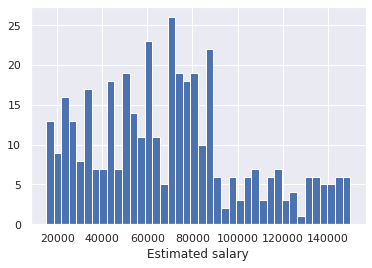

In [ ]:
sn_data['EstimatedSalary'].hist(bins=40)
plt.xlabel('Estimated salary')

### Estimated salary age distribution


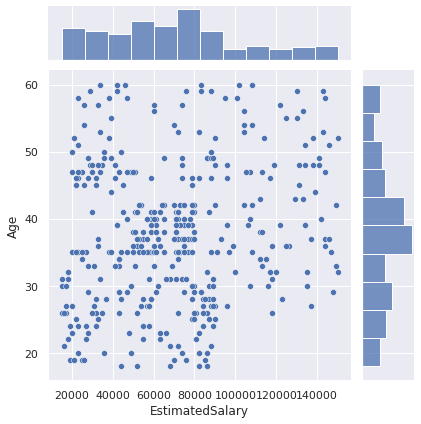

In [ ]:
sns.jointplot(x='EstimatedSalary',y='Age',data=sn_data)

### Estimnated salary VS purchased


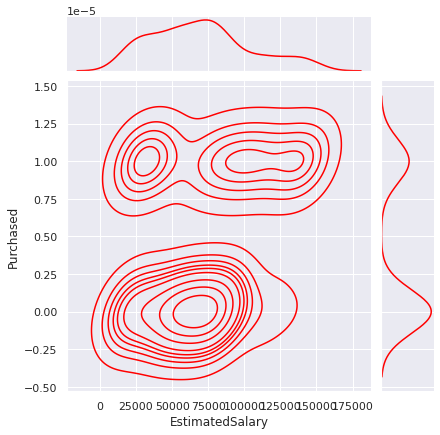

In [ ]:
sns.jointplot(x='EstimatedSalary',y='Purchased',data=sn_data, color='red', kind='kde');

## Estimated salary purchased distribution

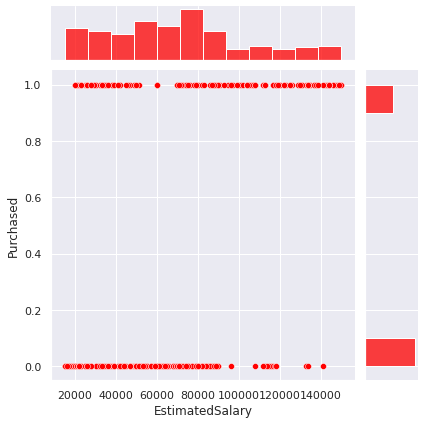

In [ ]:
sns.jointplot(x='EstimatedSalary',y='Purchased',data=sn_data,color='red');

In [ ]:
sn_data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

### Purchased vs Ages

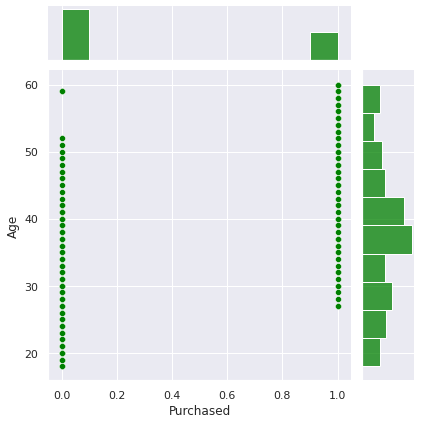

In [ ]:
sns.jointplot(x='Purchased',y='Age',data=sn_data,color='green')

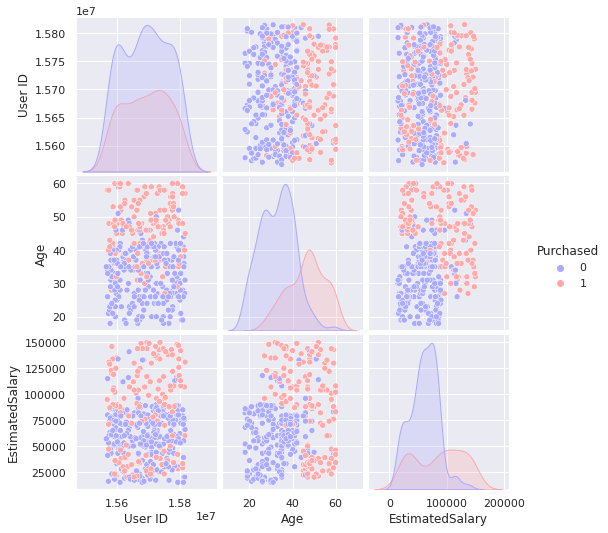

In [ ]:
sns.pairplot(sn_data, hue='Purchased',palette='bwr')

### Convert into dummies

In [ ]:
sn_data_ = pd.get_dummies(sn_data, drop_first=True)

display(sn_data.head())
display(sn_data_.head())


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


### Training model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = sn_data_[['User ID',  'Age','EstimatedSalary', 'Gender_Male']]
y = sn_data_['Purchased']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=103)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        83
           1       0.89      0.49      0.63        49

    accuracy                           0.79       132
   macro avg       0.83      0.73      0.74       132
weighted avg       0.81      0.79      0.77       132



In [ ]:
print('The Prediction Acuracy of the model is ', logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print("Users made a purchase", sum(pp!=0))
print("Users did not make a purchase", sum(pp==0))

The Prediction Acuracy of the model is  0.7878787878787878
Users made a purchase 27
Users did not make a purchase 105
